In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'Educative/Advanced_DL_and_NLP_projects/Covid19_Detection_System'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/Educative/Advanced_DL_and_NLP_projects


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [ ]:
train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = image.ImageDataGenerator(rescale=1./255)
test_datagen = image.ImageDataGenerator(rescale=1./255)


##Load the dataset

In [ ]:
train_generator = train_datagen.flow_from_directory('CovidDataset/Train', target_size=(224, 224), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory('CovidDataset/Val', target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory('CovidDataset/Test', target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

Found 224 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## Visualize the dataset

In [ ]:
# not to shuffle test generator
imgs, labels = next(train_generator)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def plot_images(images, labels, r, c):
  fig, axes = plt.subplots(r, c, figsize=(20, 8))
  axes = axes.flatten()
  i = 0

  for img, ax in zip(images, axes):
    title = 'Normal' if labels[i] == 1 else 'Covid'
    ax.set_title(title)
    ax.imshow(img)
    ax.axis('off')
    i += 1
  
  # plt.tight_layout()
  plt.show()

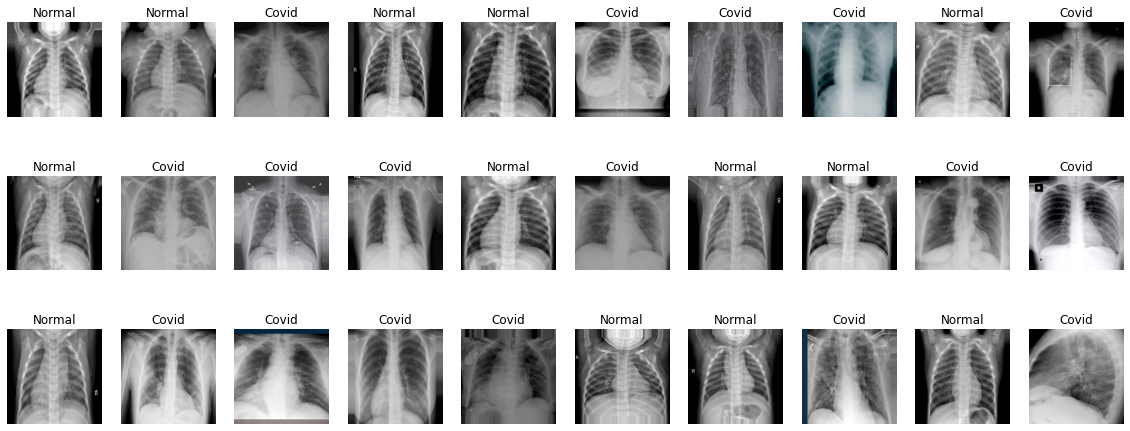

In [ ]:
plot_images(imgs, labels, 3, 10)

## Model architecture

In [ ]:
def get_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()

  return model

In [ ]:
model = get_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                  

## Training

In [ ]:
hist = model.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=2)

Epoch 1/10
7/7 [==============================] - 99s 14s/step - loss: 3.9645 - accuracy: 0.4955 - val_loss: 0.6810 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 77s 11s/step - loss: 0.6525 - accuracy: 0.5848 - val_loss: 0.6312 - val_accuracy: 0.6000
Epoch 3/10
7/7 [==============================] - 77s 11s/step - loss: 0.5321 - accuracy: 0.7500 - val_loss: 0.4596 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 77s 11s/step - loss: 0.3845 - accuracy: 0.8259 - val_loss: 0.3065 - val_accuracy: 0.9750
Epoch 5/10
7/7 [==============================] - 77s 11s/step - loss: 0.3111 - accuracy: 0.8973 - val_loss: 0.1547 - val_accuracy: 0.9750
Epoch 6/10
7/7 [==============================] - 77s 11s/step - loss: 0.2815 - accuracy: 0.8839 - val_loss: 0.2543 - val_accuracy: 0.9750
Epoch 7/10
7/7 [==============================] - 77s 11s/step - loss: 0.2046 - accuracy: 0.9375 - val_loss: 0.1175 - val_accuracy: 0.9750
Epoch 8/10
7/7 [===========

## Visualize results

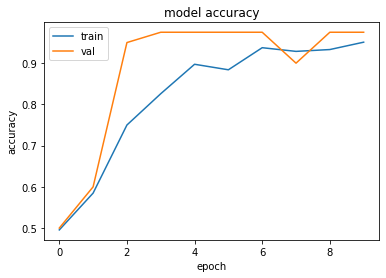

In [ ]:
 acc, val_acc = hist.history['accuracy'], hist.history['val_accuracy']
 plt.plot(acc)
 plt.plot(val_acc)
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'val'], loc='upper left')
 plt.show()

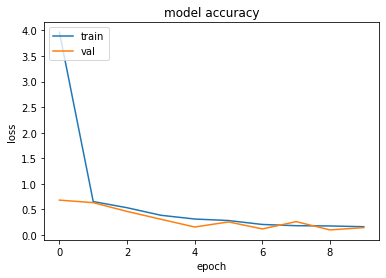

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Making predictions

In [ ]:
test_imgs, test_labels = next(test_generator)

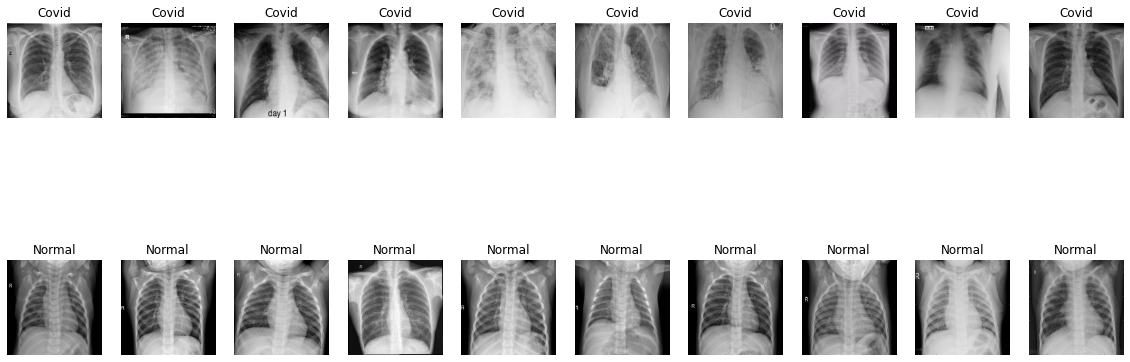

In [ ]:
plot_images(test_imgs, test_labels, 2, 10)

In [ ]:
predictions = model.predict(test_generator, steps=len(test_generator), verbose=0)

In [ ]:
predictions = np.round(predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
y_true = test_generator.classes
y_pred = np.max(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
          horizontalalignment="center",
          color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
test_generator.class_indices

{'Covid': 0, 'Normal': 1}

Confusion matrix, without normalization
[[10  0]
 [ 1  9]]


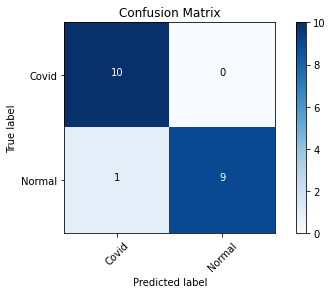

In [ ]:
cm_plot_labels = ['Covid', 'Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
test_accuracy = np.mean(y_true == y_pred)
print('Test accuracy: {:.2f}%'.format(test_accuracy * 100))

Test accuracy: 95.00%
